Problem Set 4 - Boyang Qu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")

1 (a)

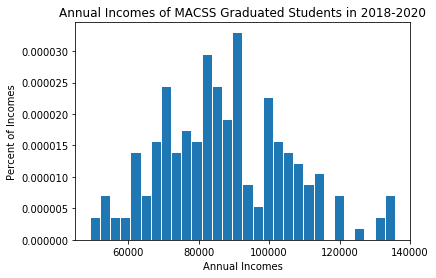

In [2]:
# Import data file
Incomes = np.loadtxt('incomes.txt')

# Plot histogram
fig,ax = plt.subplots()
ax.hist(x=Incomes, bins=30, rwidth=0.9, normed = True)
ax.set_title("Annual Incomes of MACSS Graduated Students in 2018-2020")
ax.set_xlabel("Annual Incomes")
ax.set_ylabel("Percent of Incomes")

plt.show()

(b)

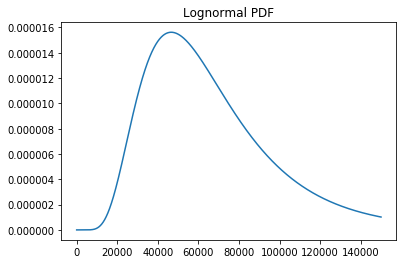

The log likelihood value is -2379.120591931827


In [3]:
# Function for lognormal distribution. 
def log_norm(x, mu = 11, sigma = 0.5):
    return 1/(x*sigma * np.sqrt(2 * np.pi))*np.e**(-(np.log(x) - mu)**2 / (2 * sigma**2))

# Function for calculation of log likelihood value.
def log_norm_trunc_pdf(x, mu, sigma, cut_lb, cut_ub):
    pdf_vals = log_norm(x, mu, sigma)
    if cut_lb!=None and cut_ub!=None:
        total = quad(lambda x: log_norm(x, mu,sigma), cut_lb, cut_ub)[0]
    elif cut_lb!=None and cut_ub==None:
        total = 1-quad(lambda x: log_norm(x, mu,sigma), cut_lb, np.inf)[0]
    elif cut_lb==None and cut_ub!=None:
        total = quad(lambda x: log_norm(x, mu,sigma), -np.inf, cut_ub)[0]
    else:
        total = 1
    polishedpdf = pdf_vals/total
    ln_pdf_vals = np.log(polishedpdf)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

# Plot lognormal pdf.
X = np.linspace(0,150000, 5000)
fig,ax = plt.subplots()
ax.set_title("Lognormal PDF")
ax.plot(X, log_norm(X, 11, 0.5)/quad(log_norm, 0, 150000)[0])
plt.show()

# Calculate log likelihood value.
print('The log likelihood value is', log_norm_trunc_pdf(Incomes, 11, 0.5, 0, 150000))

(c)

The ML estimate for mu is 11.361699971261004
The ML estimate for sigma is 0.2117432623314924
The maximized log likelihood value is -2240.9343375116364
The variance-covariance matrix is [[8.67691939e-05 3.92325340e-05]
 [3.92325340e-05 1.16938120e-04]]


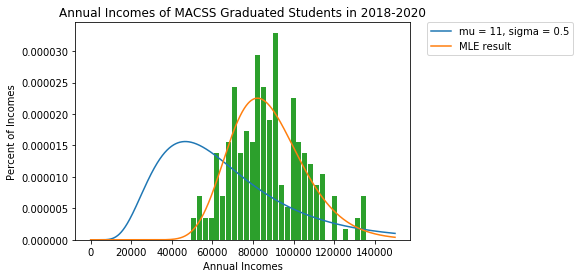

In [4]:
def crit(params, *args):
    mu, sigma = params
    x, cut_lb, cut_ub = args
    log_lik_val = log_norm_trunc_pdf(x, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val    
    return neg_log_lik_val

# Calculate MLEs, maximized loglihood value, and variance-covariance matrix.
mu_init = 11
sig_init = 0.5 
params_init = np.array([mu_init, sig_init])
mle_args = (Incomes, 0, 150000)
results_uc = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results_uc.x 
print("The ML estimate for mu is", mu_MLE)
print("The ML estimate for sigma is", sig_MLE)
print('The maximized log likelihood value is', log_norm_trunc_pdf(Incomes, mu_MLE, sig_MLE, 0, 150000))
print('The variance-covariance matrix is', results_uc.hess_inv)

# Plot the PDFs and histogram.
X = np.linspace(0,150000, 5000)
fig,ax = plt.subplots()
ax.set_title("Annual Incomes of MACSS Graduated Students in 2018-2020")
ax.set_xlabel("Annual Incomes")
ax.set_ylabel("Percent of Incomes")
# Lognormal pdf.
ax.plot(X, log_norm(X, 11, 0.5)/quad(log_norm, 0, 150000)[0], label = "mu = 11, sigma = 0.5")
# Maximized likelihood PDF.
ax.plot(X, log_norm(X, mu=mu_MLE,sigma=sig_MLE)/quad(lambda x: log_norm(x, mu=mu_MLE,sigma=sig_MLE), 0, 150000)[0], label = 'MLE result')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Histogram
ax.hist(x=Incomes, bins=30, rwidth=0.85, normed = True)
plt.show()


(d)

In [5]:
mu_new, sig_new = np.array([11, 0.5])
l_h0 = log_norm_trunc_pdf(Incomes, mu_new, sig_new, 0, 150000)
print('The hypothesis value log likelihood is', l_h0)
l_mle = log_norm_trunc_pdf(Incomes, mu_MLE, sig_MLE, 0, 150000)
print('The MLE log likelihood is', l_mle)
LR = 2 * (l_mle - l_h0)
print('The likelihood ratio value is', LR)
p_h0 = 1.0 - sts.chi2.cdf(LR, 2)
print('Therefore, chi squared of H0 with 2 degrees of freedom p-value =', p_h0)

The hypothesis value log likelihood is -2379.120591931827
The MLE log likelihood is -2240.9343375116364
The likelihood ratio value is 276.37250884038167
Therefore, chi squared of H0 with 2 degrees of freedom p-value = 0.0


Reject the null hypothesis that the data comes from distribution in part(b) because p-value is very small.

(e)

In [7]:
print("The probability that I will earn more than $100,000 is",
      quad(lambda x: log_norm(x, mu_MLE, sig_MLE), 100000, 150000)[0]/quad(lambda x: log_norm(x, mu=mu_MLE,sigma=sig_MLE), 0, 150000)[0])
print("The probability that I will earn less than $75,000 is",
      quad(lambda x: log_norm(x, mu_MLE, sig_MLE), 0, 75000)[0]/quad(lambda x: log_norm(x, mu=mu_MLE,sigma=sig_MLE), 0, 150000)[0])

The probability that I will earn more than $100,000 is 0.23427612236731754
The probability that I will earn less than $75,000 is 0.26076018268903833


2 (a)

In [8]:
# Import Data.
df=pd.read_csv("sick.txt").astype('float64')

# Functions for calculating likelihood values.
def norm_pdf(xvals, sig):
    sig=abs(sig)
    pdf_vals = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(xvals)**2 / (2*sig**2))                  
    return pdf_vals
def log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sig):
    err=y-b0-b1*x1-b2*x2-b3*x3
    pdf_vals = norm_pdf(err, sig)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
def new_crit(params,*args):  
    b0, b1, b2, b3, sig = params
    y, x1, x2, x3 = args
    log_lik_val = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sig)
    neg_log_lik_val = -log_lik_val    
    return neg_log_lik_val


b0_i, b1_i, b2_i, b3_i, sig_i = (0.2,0,0,0,1)
y, x1, x2, x3 =df['sick'], df['age'], df['children'], df['avgtemp_winter']
params_i = np.array([b0_i, b1_i, b2_i, b3_i, sig_i])
results = opt.minimize(new_crit, params_i,(y, x1, x2, x3))
b0_m, b1_m, b2_m, b3_m, sig_m = results.x
print('The MLE for beta 0 is', b0_m)
print('The MLE for beta 1 is', b1_m)
print('The MLE for beta 2 is', b2_m)
print('The MLE for beta 3 is', b3_m)
print('The MLE for sigma-square is', sig_m**2)
print("The value of the log likelihood function:",-results.fun)
print('The variance-covariance matrix is', results.hess_inv)

The MLE for beta 0 is 0.25164657743236246
The MLE for beta 1 is 0.012933389662209218
The MLE for beta 2 is 0.40050177159977757
The MLE for beta 3 is -0.00999170144778414
The MLE for sigma-square is 9.106370226208107e-06
The value of the log likelihood function: 876.8650477456889
The variance-covariance matrix is [[ 1.02601558e-06  6.76217712e-09 -1.61457419e-07 -2.23447561e-08
  -2.62509024e-09]
 [ 6.76217712e-09  3.99882010e-09 -3.59520203e-08 -2.49007806e-09
  -2.98856777e-10]
 [-1.61457419e-07 -3.59520203e-08  3.75727605e-07  2.26789439e-08
   4.78055308e-10]
 [-2.23447561e-08 -2.49007806e-09  2.26789439e-08  1.95181525e-09
   2.90327774e-10]
 [-2.62509024e-09 -2.98856777e-10  4.78055308e-10  2.90327774e-10
   2.29769926e-08]]


(b)

In [9]:
b0_t, b1_t, b2_t, b3_t, sig_t = 1, 0, 0, 0, 0.1
l_h0 = log_lik_norm(y, x1, x2, x3, b0_t, b1_t, b2_t, b3_t, sig_t)
print('The hypothesis value log likelihood is', l_h0)
print('The MLE log likelihood is', -results.fun)
LR = 2 * ((-results.fun)-l_h0)
print('The likelihood ratio value is', LR)
p_h0 = 1.0 - sts.chi2.cdf(LR, 5)
print('The chi squared of H0 with 5 degrees of freedom p-value is', p_h0)

The hypothesis value log likelihood is -2253.700688042125
The MLE log likelihood is 876.8650477456889
The likelihood ratio value is 6261.131471575628
The chi squared of H0 with 5 degrees of freedom p-value is 0.0


Reject the null hypothesis that age, number of children, and average winter temperature have no effect on sick number of sick days because p-value is very small.